In [1]:
#4.2.1
import pandas as pd
bird_data= pd.read_csv("bird_tracking.csv")

In [2]:
bird_data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [3]:
#4.2.2
import matplotlib.pyplot as plt
import numpy as np


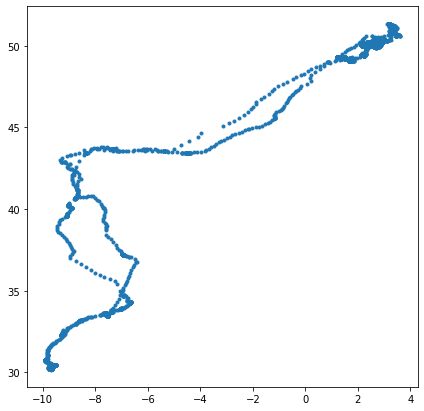

In [4]:
ix= bird_data.bird_name=="Eric"
x,y = bird_data.longitude[ix],bird_data.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

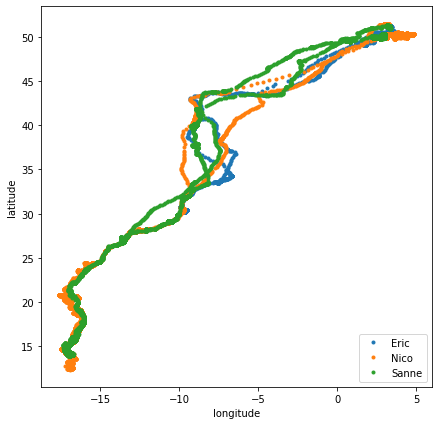

In [5]:
bird_names=pd.unique(bird_data.bird_name)
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix= bird_data.bird_name==bird_name
    x,y = bird_data.longitude[ix],bird_data.latitude[ix]
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

In [6]:
#4.2.3
ix= bird_data.bird_name=="Eric"
speed= bird_data.speed_2d[ix]

In [7]:
speed

0        0.150000
1        2.438360
2        0.596657
3        0.310161
4        0.193132
           ...   
19790    0.064031
19791    1.942395
19792    1.678392
19793    0.208087
19794    0.056569
Name: speed_2d, Length: 19795, dtype: float64

In [8]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [9]:
np.isnan(speed).any()

True

In [10]:
np.sum(np.isnan(speed))

85

In [11]:
ind= np.isnan(speed)

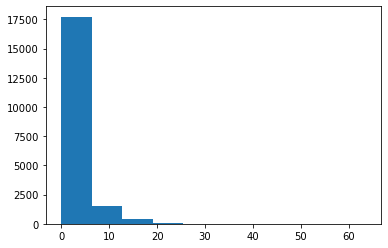

In [12]:
ix= bird_data.bird_name=="Eric"
speed= bird_data.speed_2d[ix]
ind= np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

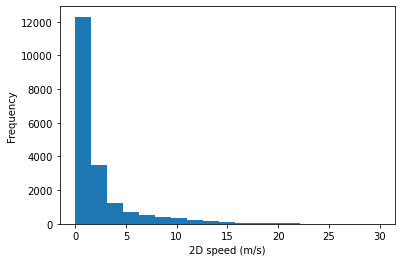

In [13]:
# ix= bird_data.bird_name=="Eric"
speed= bird_data.speed_2d[ bird_data.bird_name=="Eric"]
ind= np.isnan(speed)
plt.hist(speed[~ind],bins=np.linspace(0, 30, 20))
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

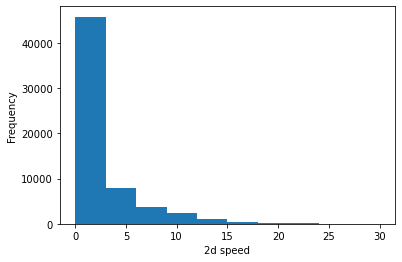

In [18]:
bird_data.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel("2d speed");
plt.savefig("pd_hist.pdf")

In [20]:
# 4.2.4: using Datetime
bird_data.date_time

0        2013-08-15 00:18:08+00
1        2013-08-15 00:48:07+00
2        2013-08-15 01:17:58+00
3        2013-08-15 01:47:51+00
4        2013-08-15 02:17:42+00
                  ...          
61915    2014-04-30 22:00:08+00
61916    2014-04-30 22:29:57+00
61917    2014-04-30 22:59:52+00
61918    2014-04-30 23:29:43+00
61919    2014-04-30 23:59:34+00
Name: date_time, Length: 61920, dtype: object

In [21]:
import datetime

In [22]:
time1=datetime.datetime.today()

In [23]:
time2=datetime.datetime.today()

In [24]:
time_delta=time2-time1

In [25]:
time_delta

datetime.timedelta(microseconds=420206)

In [26]:
date_str=bird_data.date_time[0]

In [27]:
date_str[:-3]

'2013-08-15 00:18:08'

In [28]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [29]:
timestamps = []
for k in range(len(bird_data)):
    timestamps.append(datetime.datetime.strptime\
    (bird_data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
    

In [30]:
bird_data["timestamps"]= pd.Series(timestamps, index=bird_data.index)

In [31]:
bird_data.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [32]:
times=bird_data.timestamps[bird_data.bird_name=='Eric']
elapsed_time=[time-times[0] for time in times]

In [33]:
elapsed_time[1000] / datetime.timedelta(days=1)

12.084722222222222

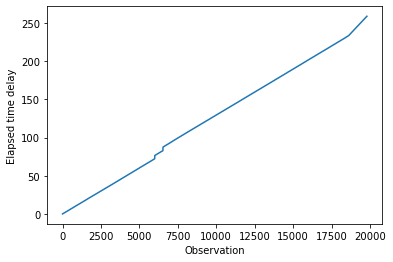

In [34]:
bird_data["timestamps"]= pd.Series(timestamps, index=bird_data.index)

times=bird_data.timestamps[bird_data.bird_name=='Eric']
elapsed_time=[time-times[0] for time in times]

plt.plot(np.array(elapsed_time)/ datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time delay")
plt.savefig("timeplot.pdf")

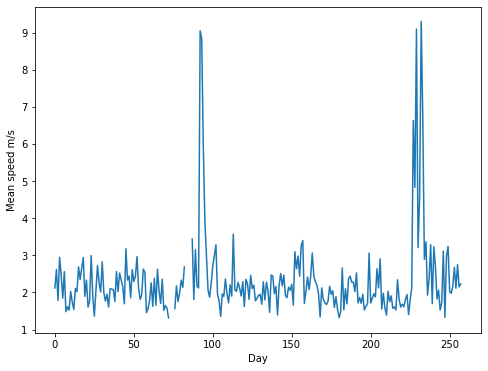

In [35]:
#4.2.5- calculating daily mean speed 



data= bird_data[bird_data.bird_name =='Eric']
times=data.timestamps
elapsed_time=[time-times[0] for time in times]
elapsed_day = np.array(elapsed_time)/ datetime.timedelta(days=1)

next_day = 1
inds =  []
daily_mean_speed= []
for (i,t) in enumerate(elapsed_day):
    if t<next_day:
        inds.append(i)
    else:
        #compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day +=1
        inds = []
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed m/s");
plt.savefig("dms.pdf")

In [36]:
data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
19790,19790,12,2014-04-30 21:51:26+00,851,120.619823,51.322966,3.216576,0.064031,Eric,2014-04-30 21:51:26
19791,19791,34,2014-04-30 22:21:33+00,851,35.683036,51.323116,3.216659,1.942395,Eric,2014-04-30 22:21:33
19792,19792,1,2014-04-30 22:51:41+00,851,-52.808233,51.322979,3.216463,1.678392,Eric,2014-04-30 22:51:41
19793,19793,7,2014-04-30 23:21:34+00,851,-38.675683,51.322986,3.216340,0.208087,Eric,2014-04-30 23:21:34


In [37]:
data1= bird_data[bird_data.bird_name =='Sanne']

In [45]:
data1

NameError: name 'mean' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\feat

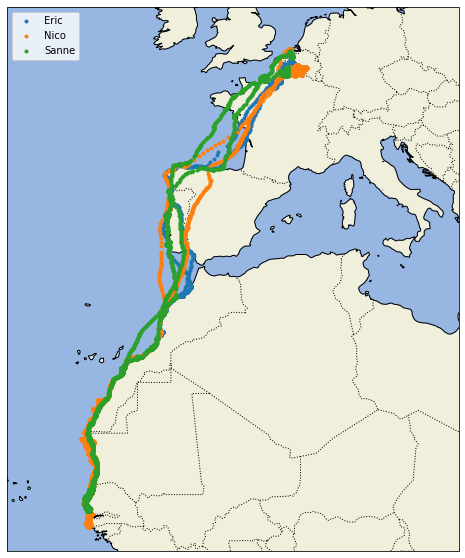

In [43]:
#4.2.6 Using the Cartopy Library

import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, Linestyle=":")

for name in bird_names:
    ix= bird_data["bird_name"]==name
    x, y=bird_data.longitude[ix],bird_data.latitude[ix]
    ax.plot(x, y,".", transform=ccrs.Geodetic(), label=name)
    
plt.legend(loc="upper left")
plt.savefig("map.pdf")